# Iris Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
iris_df=pd.read_csv('Iris.csv')

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 6)

In [5]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Sepal Length (cm):
Represents the length of the sepal (the outermost petal) of the iris flower.
Numeric values in centimeters.

Sepal Width (cm):
Represents the width of the sepal of the iris flower.
Numeric values in centimeters.

Petal Length (cm):
Represents the length of the petal (the inner petal) of the iris flower.
Numeric values in centimeters.

Petal Width (cm):
Represents the width of the petal of the iris flower.
Numeric values in centimeters.

Species:
This is the target variable or label indicating the species of the iris flower.
It is a categorical variable with three possible values: setosa, versicolor, and virginica.
In numerical form, setosa is typically represented as 0, versicolor as 1, and virginica as 2.

In [6]:
if 'Id' in iris_df.columns:
    df = iris_df.drop('Id', axis=1)

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Data Visualization

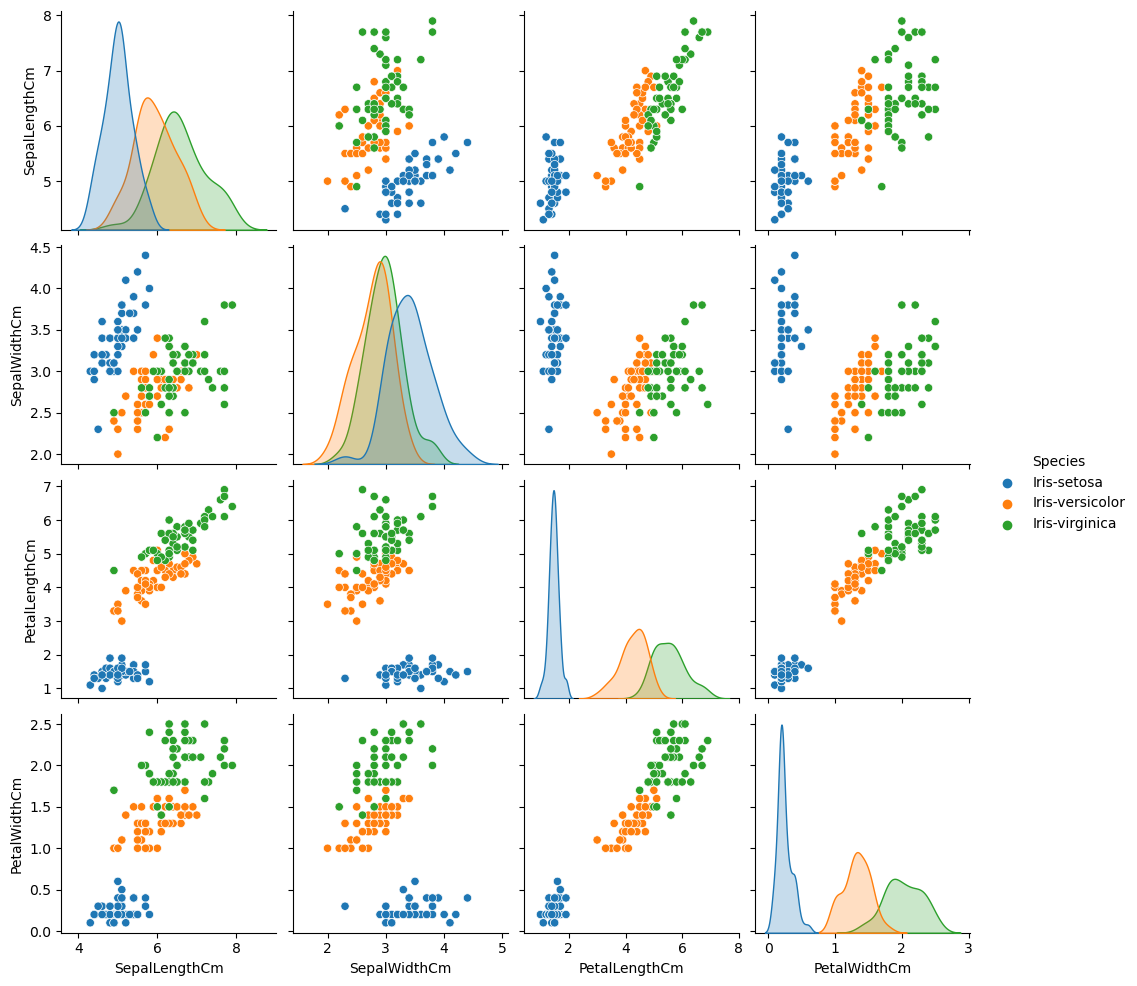

In [9]:
sns.pairplot(df, hue='Species')
plt.show()

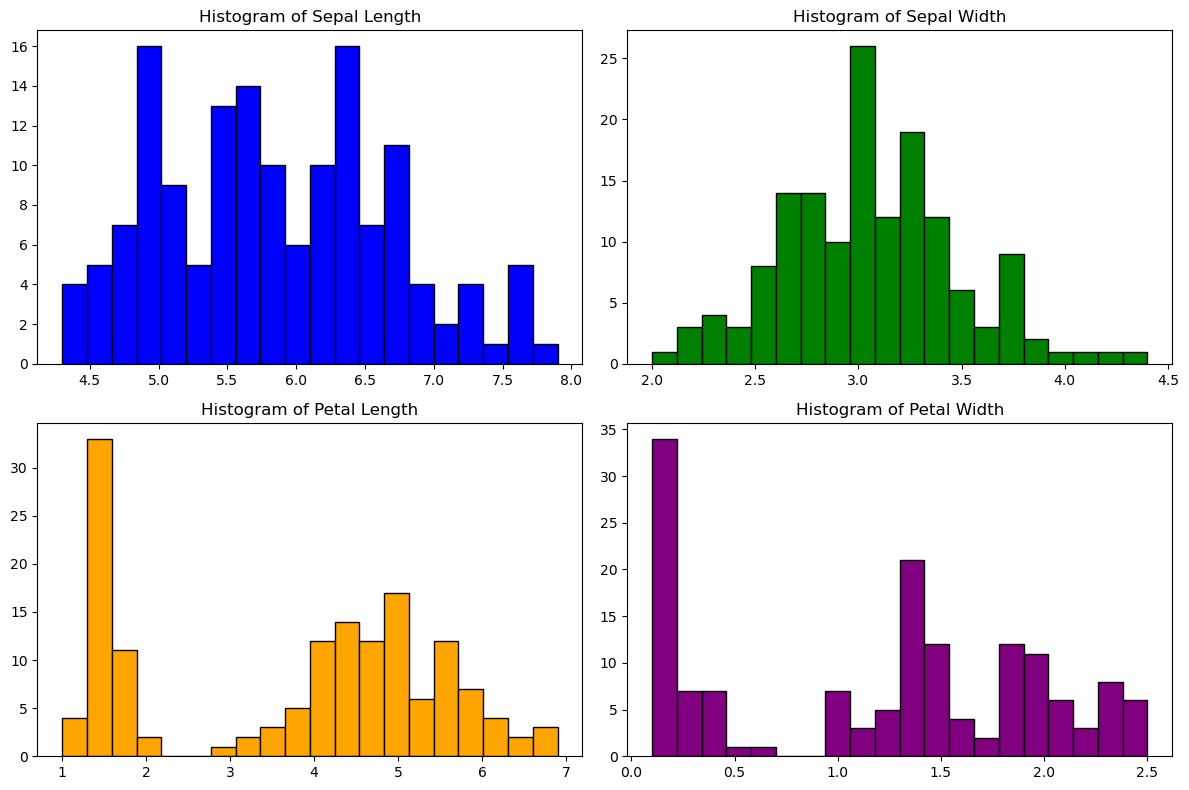

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['SepalLengthCm'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sepal Length')

plt.subplot(2, 2, 2)
plt.hist(df['SepalWidthCm'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Sepal Width')

plt.subplot(2, 2, 3)
plt.hist(df['PetalLengthCm'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Petal Length')

plt.subplot(2, 2, 4)
plt.hist(df['PetalWidthCm'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Petal Width')

plt.tight_layout()
plt.show()

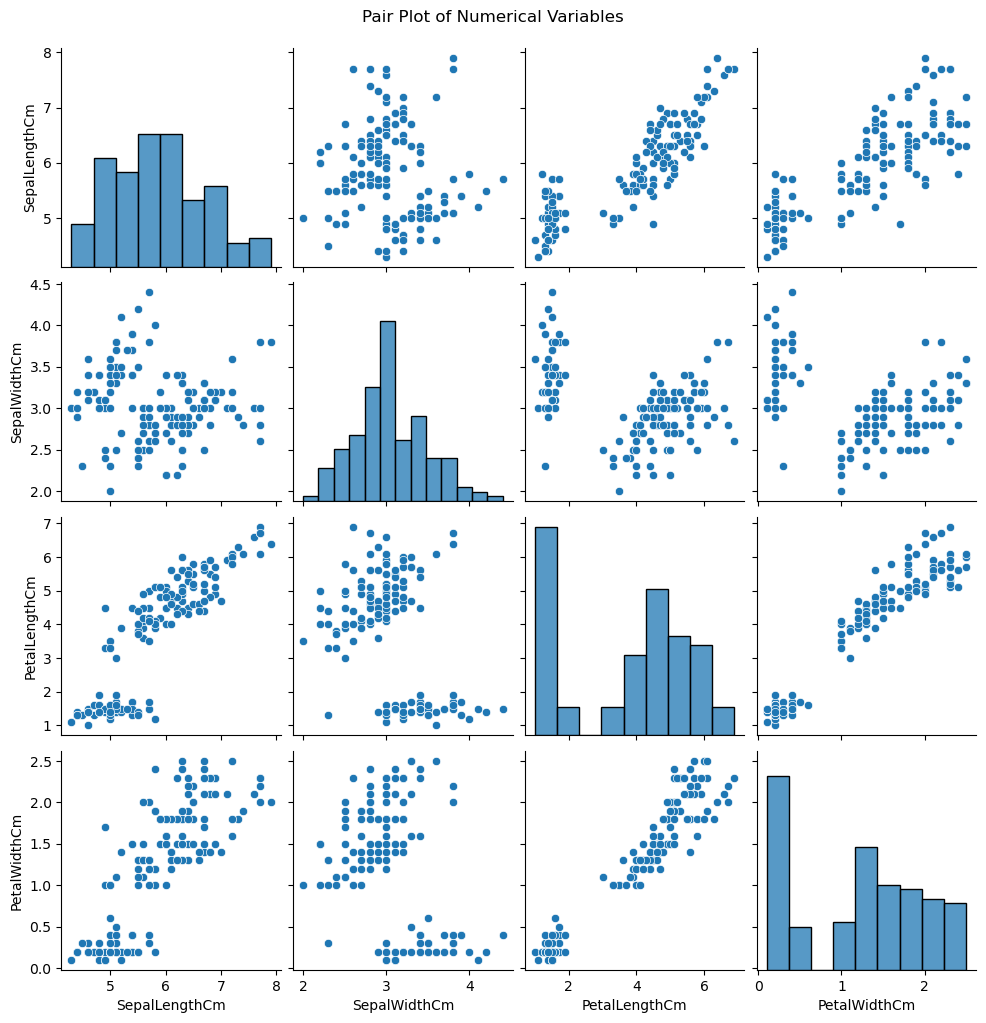

In [11]:
sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

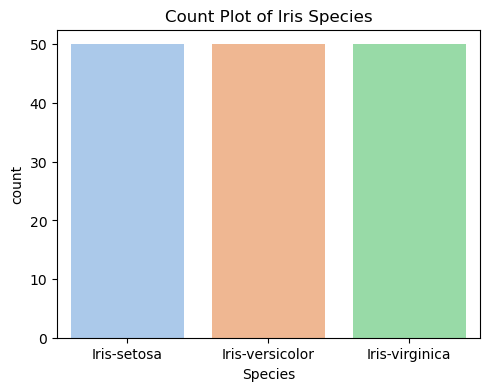

In [12]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=df['Species'], palette='pastel')
plt.title('Count Plot of Iris Species')

plt.show()


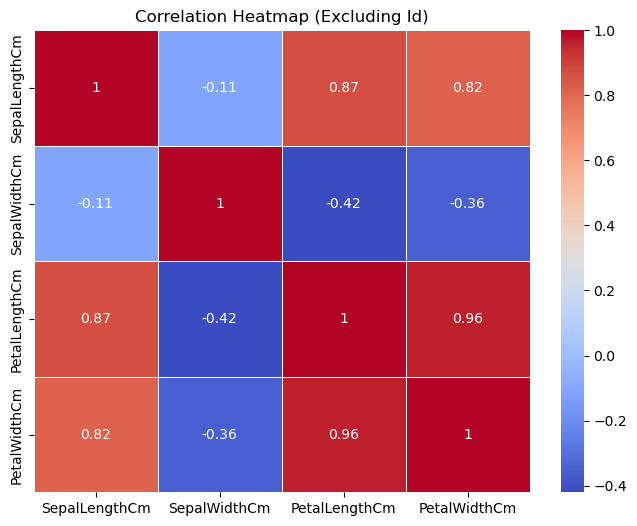

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (Excluding Id)')
plt.show()

## Model Training and Testing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X=df.drop(columns=['Species'])
Y=df['Species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train.values, y_train)
y_pred = knn.predict(x_test.values)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [16]:
import pickle
filename = 'iris_model.pkl'
with open(filename, 'wb') as model_file:
    pickle.dump(knn, model_file)

with open(filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

new_data_point = [[5.1, 3.5, 1.4, 0.2]] 
prediction = loaded_model.predict(new_data_point)

print("Predicted class:", prediction)

Predicted class: ['Iris-setosa']


In [17]:
import sklearn 
print(sklearn.__version__)

1.0.2
